**ERD da base de dados**

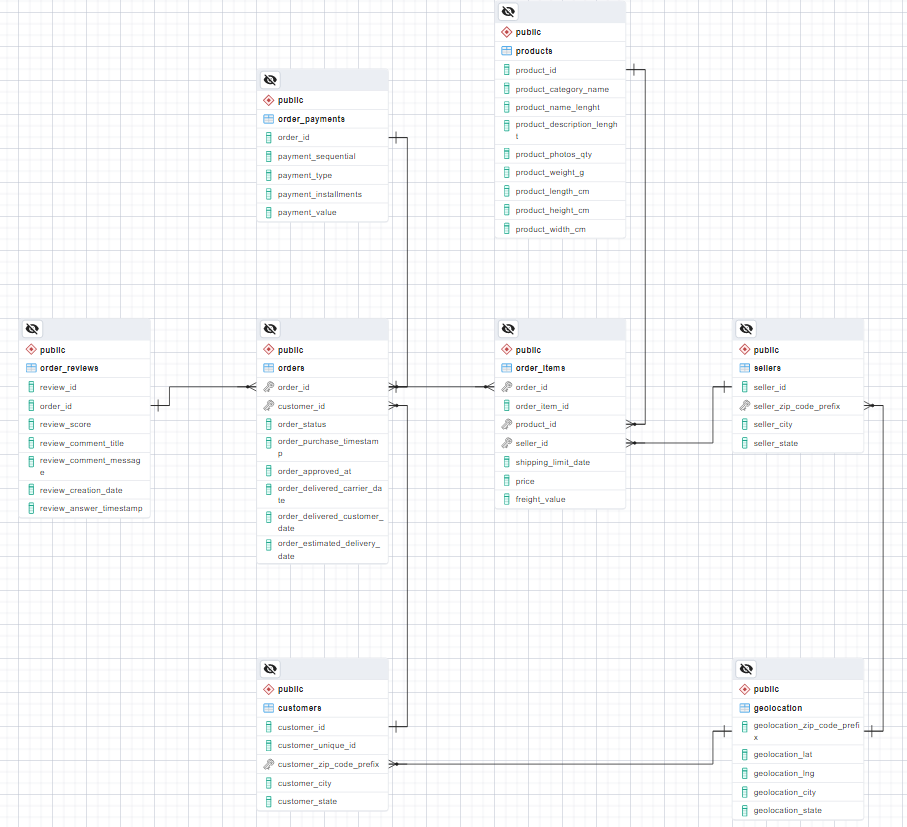

# Importando libs e carregando dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2

In [2]:
# Conectando ao banco Postgres local e realizando consultas
# LEMBRAR DE SUBSTITUIR A SENHA POR **** ANTES DE SUBIR PARA O GITHUB
con = psycopg2.connect(host='localhost', database='olist',
                       user='postgres', password='********')
cur = con.cursor()

sql_orders = 'SELECT * FROM orders'
sql_customers = 'SELECT * FROM customers'

df_orders = pd.read_sql_query(sql_orders, con)
df_customers = pd.read_sql_query(sql_customers, con)

C:\Users\ruanc\AppData\Local\Temp\ipykernel_4820\288581979.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_orders = pd.read_sql_query(sql_orders, con)
C:\Users\ruanc\AppData\Local\Temp\ipykernel_4820\288581979.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_customers = pd.read_sql_query(sql_customers, con)


# Tratamento dos dados

In [3]:
# Função para gerar metadados
def generate_metadata(dataframe):
  """
  Gera um dataframe contendo metadados das colunas do dataframe fornecido.

  :param dataframe: Dataframe para o qual os metadados são gerados.
  :return: Dataframe contendo metadados.
  """

  # Coleta de metadados básicos
  metadata = pd.DataFrame({
      'Coluna' : dataframe.columns,
      'Tipo de dados' : dataframe.dtypes,
      'Cardinalidade' : dataframe.nunique(),
      'Valores ausentes' : dataframe.isnull().sum(),
      'Valores ausentes (%)' : round(dataframe.isnull().sum() / len(dataframe) * 100, 2),
      'Amostra de dados' : dataframe.apply(lambda x: str(list(x.sample(3)) if len(x) > 3 else list(x)))
  })

  metadata = metadata.sort_values(by='Tipo de dados')
  metadata = metadata.reset_index(drop=True)

  return metadata

In [4]:
# Metadados no dataframe orders
generate_metadata(df_customers)

,Coluna,Tipo de dados,Cardinalidade,Valores ausentes,Valores ausentes (%),Amostra de dados
0,customer_id,object,99441,0,0.0,"['6bc2db722431353a176d8d00146e55d0', '443e207b..."
1,customer_unique_id,object,96096,0,0.0,"['ee4de52e707ecea5db59cbf376e37855', '9f2c3722..."
2,customer_zip_code_prefix,object,14994,0,0.0,"['46130', '23946', '89069']"
3,customer_city,object,4119,0,0.0,"['fortaleza', 'belem', 'paulo frontin']"
4,customer_state,object,27,0,0.0,"['SP', 'MG', 'RJ']"


In [5]:
# Metadados no dataframe clients
generate_metadata(df_orders)

,Coluna,Tipo de dados,Cardinalidade,Valores ausentes,Valores ausentes (%),Amostra de dados
0,order_purchase_timestamp,datetime64[ns],98875,0,0.00,"[Timestamp('2018-01-08 11:53:35'), Timestamp('..."
1,order_approved_at,datetime64[ns],90733,160,0.16,"[Timestamp('2018-02-05 12:29:51'), Timestamp('..."
2,order_delivered_carrier_date,datetime64[ns],81018,1783,1.79,"[Timestamp('2018-07-26 15:26:00'), Timestamp('..."
3,order_delivered_customer_date,datetime64[ns],95664,2965,2.98,"[Timestamp('2018-03-07 15:42:13'), Timestamp('..."
4,order_id,object,99441,0,0.00,"['86ab312ff20b032420f0320b32a37f12', '857a8327..."
5,customer_id,object,99441,0,0.00,"['efb23a9163bb0793cf158ad6934a9694', '1fb84b80..."
6,order_status,object,8,0,0.00,"['delivered', 'delivered', 'invoiced']"
7,order_estimated_delivery_date,object,459,0,0.00,"[datetime.date(2018, 7, 12), datetime.date(201..."
